***Text classification*** is a crucial application of Natural Language Processing (NLP) that enables automatic labeling of textual content into predefined categories. In this project, we work with a real-world e-commerce dataset containing product descriptions and their corresponding categories. The aim is to build a multi-class text classification model that can accurately predict the category of a product based on its description. Automating this process is particularly valuable in large-scale e-commerce platforms, where manual tagging of thousands of products is time-consuming, inconsistent, and error-prone.

The eCommerce dataset offers a practical challenge, as it includes noisy, real-world product descriptions from various categories such as household items, office supplies, and more. The classification pipeline we implemented explores multiple embedding techniques including TF-IDF, Word2Vec (GloVe), and Bag-of-Words with unigrams and bigrams, followed by a machine learning models. The goal is to evaluate and compare the effectiveness of each approach. The code developed through this assignment is not only academically insightful but also potentially useful for real-world deployment in automated product categorization, enhancing catalog management, search relevance, and user experience in e-commerce platforms.

In [ ]:
!pip install numpy==1.24.4 scipy==1.10.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
cvxpy 1.6.5 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
thinc 8.3.6 

In [ ]:
!pip install gensim==4.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 24.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

url = 'https://zenodo.org/record/3355823/files/ecommerceDataset.csv?download=1'

# Converting to Dataframe.
df = pd.read_csv(url, header=None)

In [ ]:
# Renaming the columns for clarity.
df.columns = ['Category', 'Description']

# Displaying basic information and first few rows to confirm that the changes have been made.
print("Dataset Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     50425 non-null  object
 1   Description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB
None

First 5 Rows:
    Category                                        Description
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...


Doing basic **Exploratory Analysis** of our Dataset. Necessary to understand the nuances like duplicate and empty rows.

In [ ]:
# Shape of the dataset.
print("Shape of dataset:", df.shape)

# Column names.
print("\nColumns:", df.columns.tolist())

# Checking for missing values.
print("\nMissing values:\n", df.isnull().sum())

# Basic data types.
print("\nData types:\n", df.dtypes)

# Show a sample of 5 random rows.
df.head(5)

Shape of dataset: (50425, 2)

Columns: ['Category', 'Description']

Missing values:
 Category       0
Description    1
dtype: int64

Data types:
 Category       object
Description    object
dtype: object


,Category,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [ ]:
# Dropping the row with the missing description.
df = df.dropna(subset=['Description'])

# Dropping duplicates from the Dataset.
df = df.drop_duplicates()

# Final number of entries after basic cleaning of the Dataset.
df.count()

,0
Category,27802
Description,27802


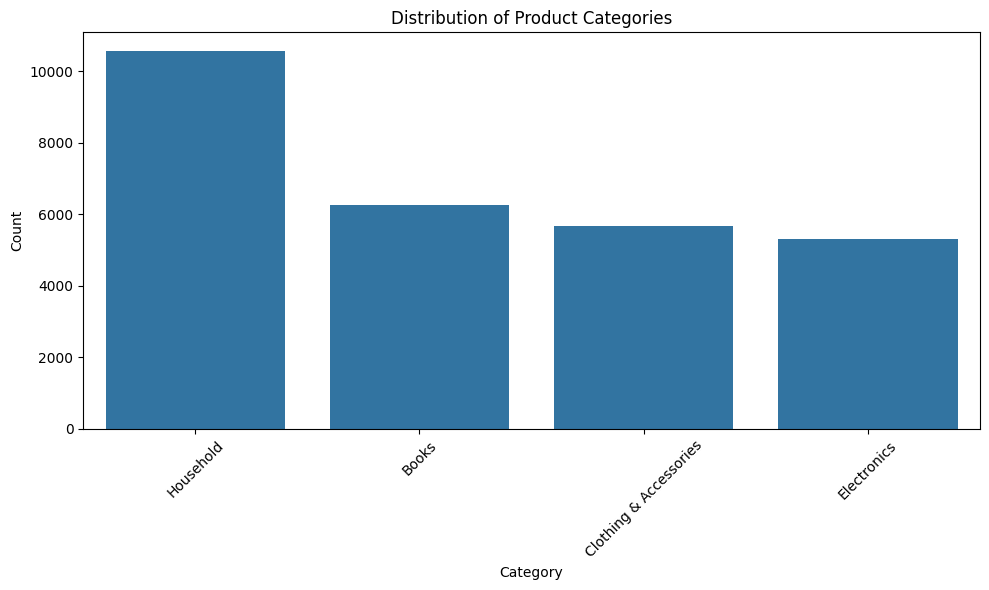

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the category distribution.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

After finishing the initial exploratory analysis of our Dataset, we now proceed with the next step of our **Text Classification Pipeline: Text Preprocessing**. This involves cleaning the text data by removing stopwords, eliminating punctuation and digits, and applying lemmatization. These preprocessing steps are essential to reduce noise in the data and to ensure that the model captures the most meaningful and relevant patterns from the text descriptions.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloading the required resources.
nltk.download('stopwords')
nltk.download('wordnet')

# Text cleaning function.
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Removing the punctuation and numbers.
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] # Reducing words to their base form using lemmatization.
    return ' '.join(tokens)

# Applying customized cleaning function.
df['Cleaned_Description'] = df['Description'].apply(clean_text)

# Preview  the cleaned data side by side the original one for comaprison.
print(df[['Category', 'Cleaned_Description']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


    Category                                Cleaned_Description
0  Household  paper plane design framed wall hanging motivat...
1  Household  saf floral framed painting wood inch x inch sp...
2  Household  saf uv textured modern art print framed painti...
3  Household  saf flower print framed painting synthetic inc...
4  Household  incredible gift india wooden happy birthday un...


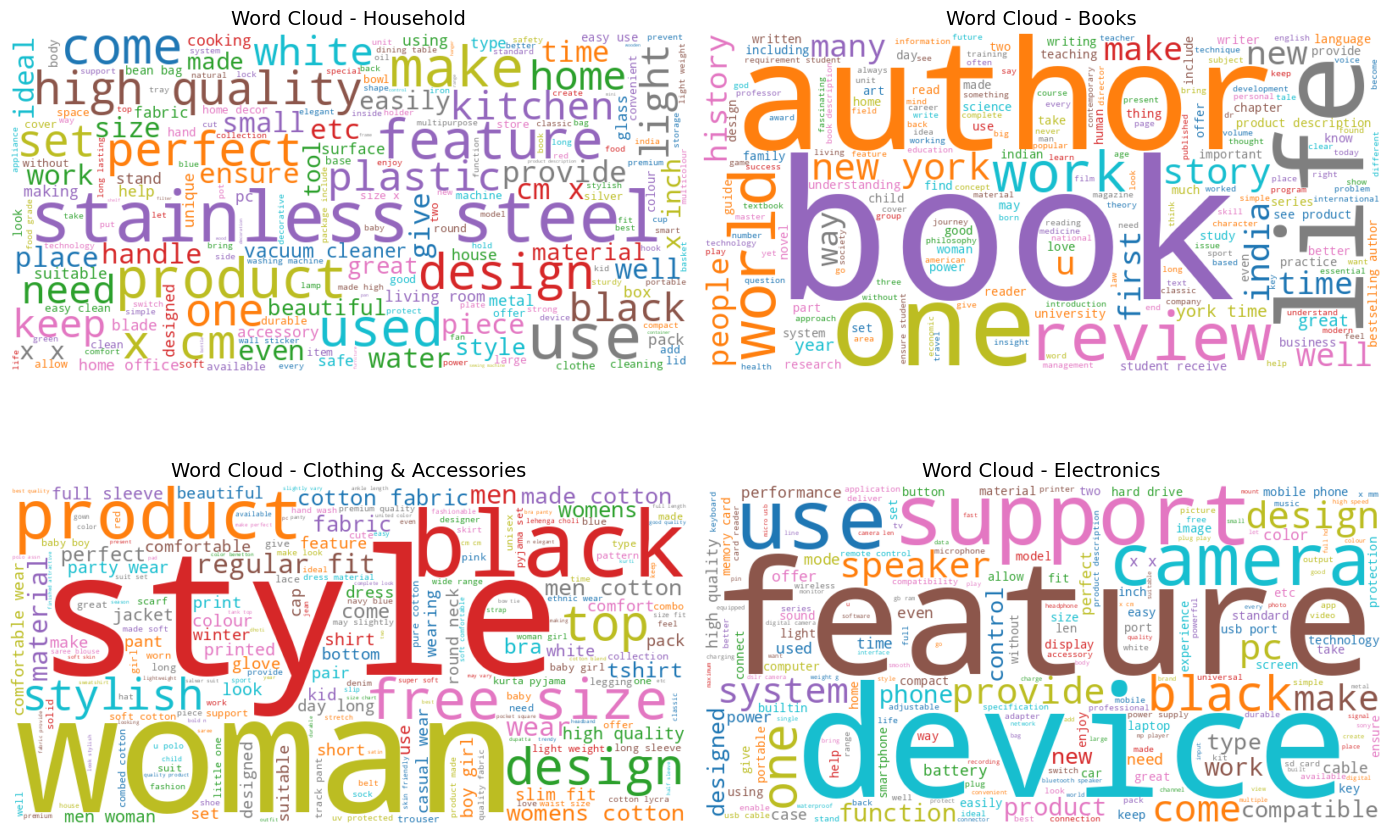

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create word clouds for each category (2x2 layout)
categories = df['Category'].unique()
plt.figure(figsize=(14, 10))

for idx, category in enumerate(categories):
    text = ' '.join(df[df['Category'] == category]['Cleaned_Description'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate(text)

    plt.subplot(2, 2, idx + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - {category}', fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()


After Preprocessing the text data by removing stopwords, punctuation, digits, and applying lemmatization, we calculate the average number of words per cleaned description and the total number of unique words or (vocabulary size) in the dataset. This step is crucial in understanding the dataset's linguistic structure and complexity. Knowing the average word count helps gauge the typical length of descriptions. Estimating the unique word count helps in deciding parameters for vectorization methods like TF-IDF, Bag-of-Words, gloVe or Word2Vec — such as the max_features parameter, which limits the number of tokens to consider based on frequency. This ensures efficient memory usage and helps retain the most informative tokens for downstream classification tasks.

In [ ]:
# Creating a new column with the word count of each cleaned description.
df['word_count'] = df['Cleaned_Description'].apply(lambda desc: len(desc.split()))

# Then compute the average.
average_words = df['word_count'].mean()

print(f"Average words per cleaned description: {average_words:.2f}")

Average words per cleaned description: 71.27


In [ ]:
# Splitting each description into tokens.
token_lists = df['Cleaned_Description'].apply(lambda txt: txt.split())

# Flatten this into one list.
all_tokens = [token for sublist in token_lists for token in sublist]

# Get the set of unique tokens.
unique_tokens = set(all_tokens)

# Number of unique words in the entire dataset after custom cleaning.
vocab_size = len(unique_tokens)

print(f"Number of unique words in the corpus: {vocab_size}")

Number of unique words in the corpus: 89878


Now with a clear understanding of our dataset's vocabulary size and text length, we now move into the **Embedding stage of our Text Classification Pipeline**. Embedding transforms our cleaned textual data into numerical representations that can be interpreted by the Machine learning model. In this project, we experiment with four different Embedding Methods — *TF-IDF, Bag of Words (BoW) with unigrams and bigrams, GloVe and Word2Vec*. Each method provides a unique approach to capturing the semantic and contextual relationships in text, allowing us to compare their effectiveness in downstream classification..

**TF-IDF Embedding :** We begin our embedding with TF-IDF (Term Frequency–Inverse Document Frequency), a widely-used technique in text mining. It measures the importance of a word in a document relative to a collection (or corpus) of documents. It reduces the weight of common words while emphasizing terms that are more informative and unique to a document. This makes TF-IDF especially useful for classification tasks where distinguishing features are essential.

In our implementation, we limit the feature space to the top 5,000 words ranked by importance, helping reduce computational complexity while preserving valuable information.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing the TF-IDF vectorizer.
tfidf_vect = TfidfVectorizer(max_features=5000)

# Fitting on all cleaned descriptions and transforming it.
X_tfidf = tfidf_vect.fit_transform(df['Cleaned_Description'])

# X_tfidf is a (n_samples × 5000) sparse matrix of TF‑IDF features.
print("TF-IDF shape:", X_tfidf.shape)

TF-IDF shape: (27802, 5000)


**Bag of Words Embedding (Unigrams & Bigrams) :** The Bag of Words (BoW) model represents each document by counting the occurrences of terms in a fixed vocabulary. By setting ngram_range=(1,2), we capture both unigrams (individual words) and bigrams (pairs of consecutive words), allowing the model to recognize common word pairs in addition to single tokens. Limiting the vocabulary to the top 5,000 most frequent n‑grams reduces dimensionality and focuses on the most informative features. The result is a sparse matrix X_bow of shape (n_samples, 5000).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initializing the BoW vectorizer (unigrams and bigrams, with top 5,000 features)
bow_vect = CountVectorizer(
    ngram_range=(1, 2),
    max_features=5000,     # Limiting the vocab size to 5,000
    binary=False
)

# Fitting to the cleaned descriptions and then transforming it.
X_bow = bow_vect.fit_transform(df['Cleaned_Description'])

# Inspect the shape.
print("X_bow shape:", X_bow.shape)

X_bow shape: (27802, 5000)


**MOVING TO ADVANCE EMBEDDING METHODS -->**

**GloVe Embedding (Pre-trained Word2Vec) :** For the second embedding method, we apply GloVe (Global Vectors for Word Representation), a pre-trained word embedding technique developed by Stanford. GloVe captures semantic relationships between words by analyzing word co-occurrence statistics across a large corpus. Unlike TF-IDF and Bag of Words, GloVe generates dense vector representations that preserve contextual meaning and relationships between words in a continuous vector space.

We use the glove-wiki-gigaword-300 model, which provides 300-dimensional word vectors trained on Wikipedia and Gigaword data. For each cleaned description, we calculate the mean of all word vectors, resulting in a single fixed-size representation per document. This allows us to convert our entire text dataset into a 2D matrix (X_glove) that can be used in classification models.

In [ ]:
import gensim.downloader as api

# Loading the GloVe embeddings (e.g., GloVe wiki dataset with 300 dimensions).
glove_model = api.load('glove-wiki-gigaword-300')

# Checking the model size.
print(f"GloVe Model Loaded! Dimensions: {glove_model.vector_size}")

[==================================================] 100.0% 376.1/376.1MB downloaded
GloVe Model Loaded! Dimensions: 300


In [ ]:
import numpy as np

def get_glove_vector(text, model, dim=300):
    tokens = text.split()
    valid_vectors = [model[word] for word in tokens if word in model]
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        return np.zeros(dim)

# Creating a 2D numpy array of vectors for all cleaned descriptions.
X_glove = np.vstack(df['Cleaned_Description'].apply(lambda x: get_glove_vector(x, glove_model)).values)

# Checking the shape of the resulting matrix.
print("X_glove shape:", X_glove.shape)

X_glove shape: (27802, 300)


**Word2Vec Embedding :** A pre-trained word embedding technique developed by Google. Word2Vec generates word vectors based on the context in which words appear, using a shallow neural network to either predict a target word given its context (Skip-gram) or predict the context words given a target word (CBOW). Unlike traditional methods like TF-IDF and Bag of Words, Word2Vec produces dense vector representations that capture both semantic and syntactic relationships between words. These embeddings represent each word in the corpus as a fixed-size vector, enabling the model to preserve word meanings in a continuous vector space.

We here use the Google News Word2Vec model, which provides 300-dimensional word vectors trained on a large corpus of Google News data. For each cleaned description, we calculate the mean of all word vectors, resulting in a single, fixed-size representation per document. This approach allows Word2Vec to capture the contextual meaning of words within the descriptions, providing a richer representation than traditional bag-of-words models.

In [ ]:
import gensim.downloader as api

# Load the pre-trained Word2Vec model (Google News)
w2v_model = api.load('word2vec-google-news-300')  # 300-dimensional embeddings

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
import numpy as np

def get_average_word2vec(text, model, vector_size=300):
    words = text.split()
    valid_words = [word for word in words if word in model]
    if not valid_words:
        return np.zeros(vector_size)
    return np.mean([model[word] for word in valid_words], axis=0)

X_word2vec = np.array([get_average_word2vec(text, w2v_model) for text in df['Cleaned_Description']])

# Checking the shape of the resulting matrix.
print("X_word2vec shape:", X_word2vec.shape)

X_word2vec shape: (27802, 300)


Before training our models, we need to convert the categorical target labels into a numeric format and then partition our data into training and testing sets. We use *LabelEncoder* to transform each category string into a unique integer. After encoding, we apply an 80/20 *stratified split via train_test_split* to each feature matrix (X_tfidf, X_bow, X_glove, X_word2vec) along with the encoded labels. Stratification ensures that the class distribution in the training and test subsets reflects that of the full dataset, which is important for reliable performance evaluation.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Converting the category names to integer labels.
le = LabelEncoder()
df['Encoded_Label'] = le.fit_transform(df['Category'])

In [ ]:
from sklearn.model_selection import train_test_split

# TF-IDF
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(
    X_tfidf, df['Encoded_Label'], test_size=0.2, random_state=42, stratify=df['Encoded_Label']
)

# BOW
X_bow_train, X_bow_test, y_bow_train, y_bow_test = train_test_split(
    X_bow, df['Encoded_Label'], test_size=0.2, random_state=42, stratify=df['Encoded_Label']
)

# Glove
X_glove_train, X_glove_test, y_glove_train, y_glove_test = train_test_split(
    X_glove, df['Encoded_Label'], test_size=0.2, random_state=42, stratify=df['Encoded_Label']
)

# Word2vec
X_word2vec_train, X_word2vec_test, y_word2vec_train, y_word2vec_test = train_test_split(
    X_word2vec, df['Encoded_Label'], test_size=0.2, random_state=42, stratify=df['Encoded_Label']
)


**Model Training and Evaluation :** With our dataset now encoded and partitioned into training and test sets for each feature representation (X_tfidf, X_bow, X_glove, and X_word2vec), we proceed to the model training phase. In this stage, we will fit classification algorithms to the training subsets and assess their performance on the held‑out test data. Specifically, we will:

**Why Use LinearSVC Across All Embeddings?**

We apply **LinearSVC** uniformly to every embedding representation—TF‑IDF, BoW, GloVe, and Word2Vec—because it excels at finding a maximum‐margin hyperplane in both sparse and dense feature spaces. LinearSVC is specifically optimized for high‑dimensional data, making it ideal for TF‑IDF and BoW’s thousands of sparse features, while remaining computationally efficient and robust when handling 300‑dimensional dense embeddings like GloVe and Word2Vec. Its linear decision boundary tends to generalize well, avoids overfitting through built‑in regularization, and yields models that are fast to train and predict. By using the same classifier across all embeddings, we ensure a fair, “apples‑to‑apples” comparison of how each text representation contributes to classification performance.  


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 1) TF‑IDF + Linear SVM
svc_tfidf = LinearSVC(max_iter=10000, random_state=42)
svc_tfidf.fit(X_tfidf_train, y_tfidf_train)
y_pred_tfidf_svc = svc_tfidf.predict(X_tfidf_test)

# 2) BoW + Linear SVM
svc_bow = LinearSVC(max_iter=10000, random_state=42)
svc_bow.fit(X_bow_train, y_bow_train)
y_pred_bow_svc = svc_bow.predict(X_bow_test)

# 3) GloVe + Linear SVM
svc_glove = LinearSVC(max_iter=10000, random_state=42)
svc_glove.fit(X_glove_train, y_glove_train)
y_pred_glove_svc = svc_glove.predict(X_glove_test)

# 4) Word2Vec + Linear SVM
svc_w2v = LinearSVC(max_iter=10000, random_state=42)
svc_w2v.fit(X_word2vec_train, y_word2vec_train)
y_pred_w2v_svc = svc_w2v.predict(X_word2vec_test)

# Evaluate all four
for name, y_true, y_pred in [
    ("TF‑IDF", y_tfidf_test, y_pred_tfidf_svc),
    ("BoW",    y_bow_test,    y_pred_bow_svc),
    ("GloVe",  y_glove_test,  y_pred_glove_svc),
    ("W2V",    y_word2vec_test, y_pred_w2v_svc),
]:
    print(f"--- {name} + Linear SVM ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("F1 Score  :", f1_score(y_true, y_pred, average='weighted'))
    print(classification_report(y_true, y_pred, target_names=le.classes_))
    print()


--- TF‑IDF + Linear SVM ---
Accuracy : 0.9525265240064736
F1 Score  : 0.9524502860595796
                        precision    recall  f1-score   support

                 Books       0.95      0.94      0.94      1251
Clothing & Accessories       0.97      0.98      0.98      1135
           Electronics       0.94      0.92      0.93      1062
             Household       0.94      0.96      0.95      2113

              accuracy                           0.95      5561
             macro avg       0.95      0.95      0.95      5561
          weighted avg       0.95      0.95      0.95      5561


--- BoW + Linear SVM ---
Accuracy : 0.932745909009171
F1 Score  : 0.9327803597096218
                        precision    recall  f1-score   support

                 Books       0.91      0.93      0.92      1251
Clothing & Accessories       0.97      0.96      0.96      1135
           Electronics       0.91      0.90      0.91      1062
             Household       0.94      0.93      0.94

<ipython-input-22-3bdff775ae11>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_svc_results, x="Embedding", y="Accuracy", palette="Blues_d")
<ipython-input-22-3bdff775ae11>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_svc_results, x="Embedding", y="F1 Score", palette="Greens_d")


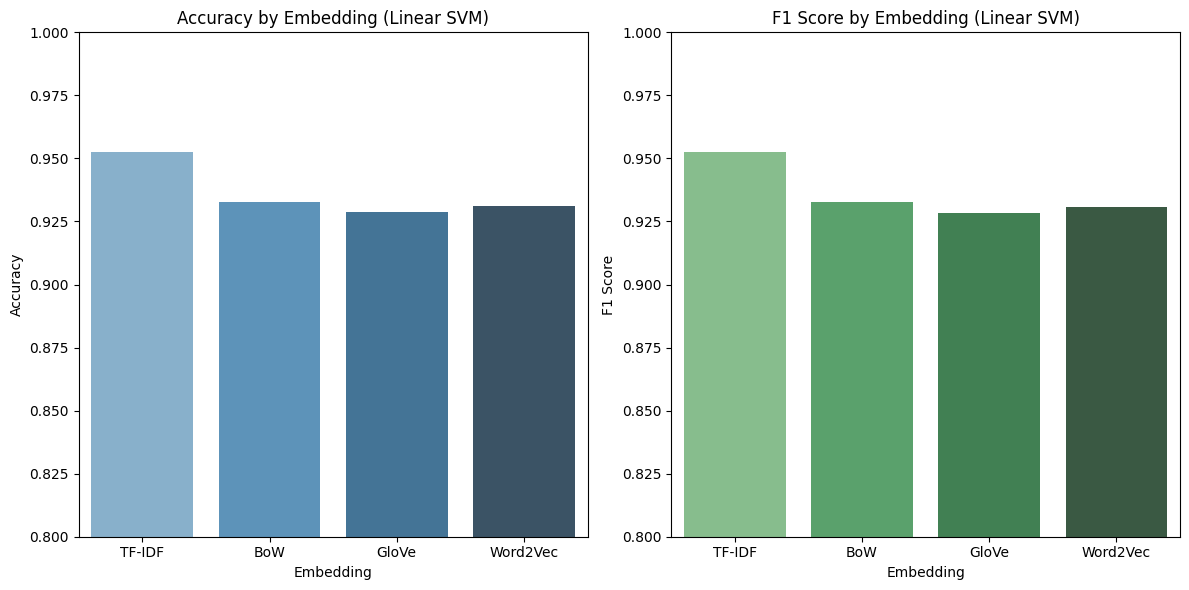

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Collecting results
svc_results = {
    "Embedding": ["TF-IDF", "BoW", "GloVe", "Word2Vec"],
    "Accuracy": [
        accuracy_score(y_tfidf_test, y_pred_tfidf_svc),
        accuracy_score(y_bow_test, y_pred_bow_svc),
        accuracy_score(y_glove_test, y_pred_glove_svc),
        accuracy_score(y_word2vec_test, y_pred_w2v_svc)
    ],
    "F1 Score": [
        f1_score(y_tfidf_test, y_pred_tfidf_svc, average='weighted'),
        f1_score(y_bow_test, y_pred_bow_svc, average='weighted'),
        f1_score(y_glove_test, y_pred_glove_svc, average='weighted'),
        f1_score(y_word2vec_test, y_pred_w2v_svc, average='weighted')
    ]
}

# Convert to DataFrame
import pandas as pd
df_svc_results = pd.DataFrame(svc_results)

# Plotting
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
sns.barplot(data=df_svc_results, x="Embedding", y="Accuracy", palette="Blues_d")
plt.title("Accuracy by Embedding (Linear SVM)")
plt.ylim(0.8, 1.0)

# F1 Score plot
plt.subplot(1, 2, 2)
sns.barplot(data=df_svc_results, x="Embedding", y="F1 Score", palette="Greens_d")
plt.title("F1 Score by Embedding (Linear SVM)")
plt.ylim(0.8, 1.0)

plt.tight_layout()
plt.show()


**TUNING THE HYPERPARMETER FOR ALL THE EMBEDDINGS -->**

In [ ]:
import time

start_time = time.time()

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
from scipy.stats import loguniform

# Define param distribution
param_dist = {
    'C': loguniform(1e-3, 1e3)
}

# Function to run randomized search and evaluation
def tune_and_evaluate(X_train, X_test, y_train, y_test, name):
    svc = LinearSVC(max_iter=10000, random_state=42)
    search = RandomizedSearchCV(
        estimator=svc,
        param_distributions=param_dist,
        n_iter=10,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1,
        random_state=42
    )
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f"\n🔍 {name} + LinearSVC (Tuned)")
    print("Best C:", search.best_params_['C'])
    print("CV Best F1:", search.best_score_)
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("Test F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    return y_pred

# Run for all embeddings
y_pred_tfidf_rs = tune_and_evaluate(X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test, "TF-IDF")
y_pred_bow_rs = tune_and_evaluate(X_bow_train, X_bow_test, y_bow_train, y_bow_test, "BoW")
y_pred_glove_rs = tune_and_evaluate(X_glove_train, X_glove_test, y_glove_train, y_glove_test, "GloVe")
y_pred_w2v_rs = tune_and_evaluate(X_word2vec_train, X_word2vec_test, y_word2vec_train, y_word2vec_test, "Word2Vec")

end_time = time.time()
execution_time = end_time - start_time
print(f"\n Hyperparameter Tuning Time: {execution_time:.2f} seconds")


🔍 TF-IDF + LinearSVC (Tuned)
Best C: 0.17670169402947944
CV Best F1: 0.9494797693280533
Test Accuracy: 0.9534256428699874
Test F1 Score: 0.9533501448710182
                        precision    recall  f1-score   support

                 Books       0.96      0.93      0.95      1251
Clothing & Accessories       0.97      0.98      0.98      1135
           Electronics       0.95      0.93      0.94      1062
             Household       0.94      0.97      0.95      2113

              accuracy                           0.95      5561
             macro avg       0.96      0.95      0.95      5561
          weighted avg       0.95      0.95      0.95      5561


🔍 BoW + LinearSVC (Tuned)
Best C: 0.008632008168602542
CV Best F1: 0.9387950844562492
Test Accuracy: 0.9404783312353893
Test F1 Score: 0.940435302513783
                        precision    recall  f1-score   support

                 Books       0.91      0.94      0.93      1251
Clothing & Accessories       0.97      0.97  

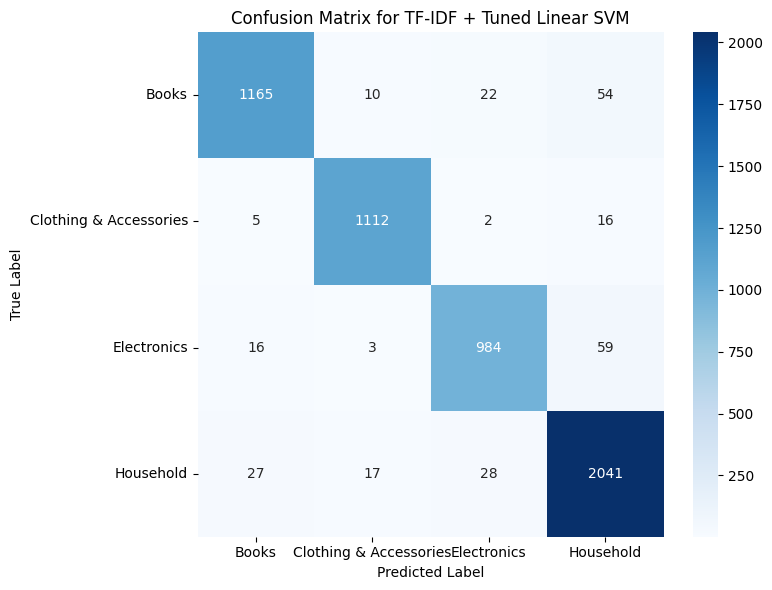

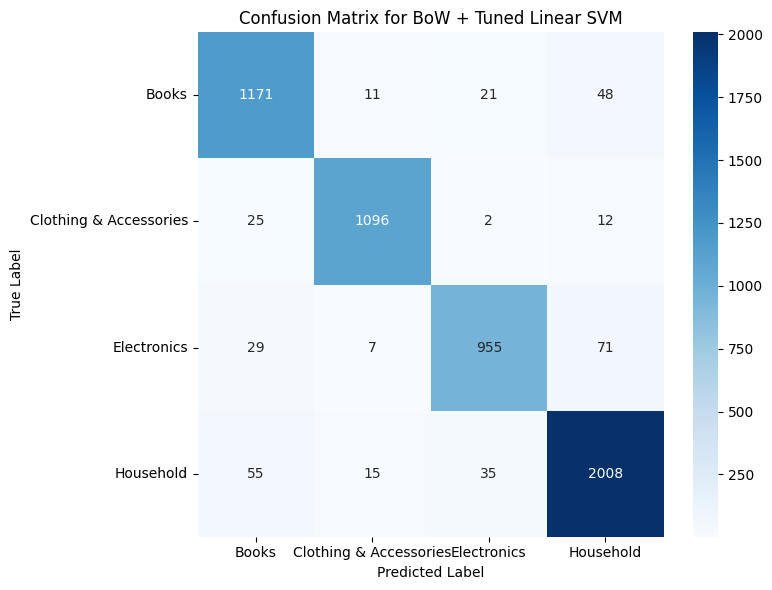

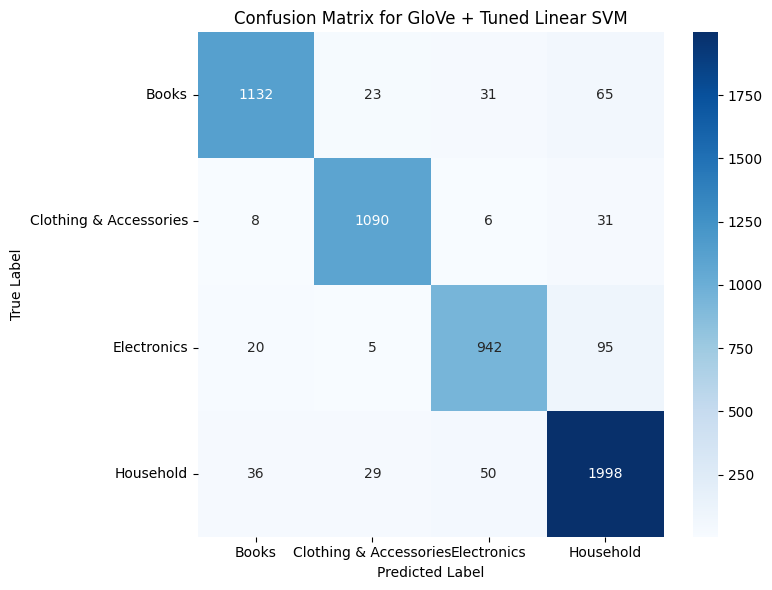

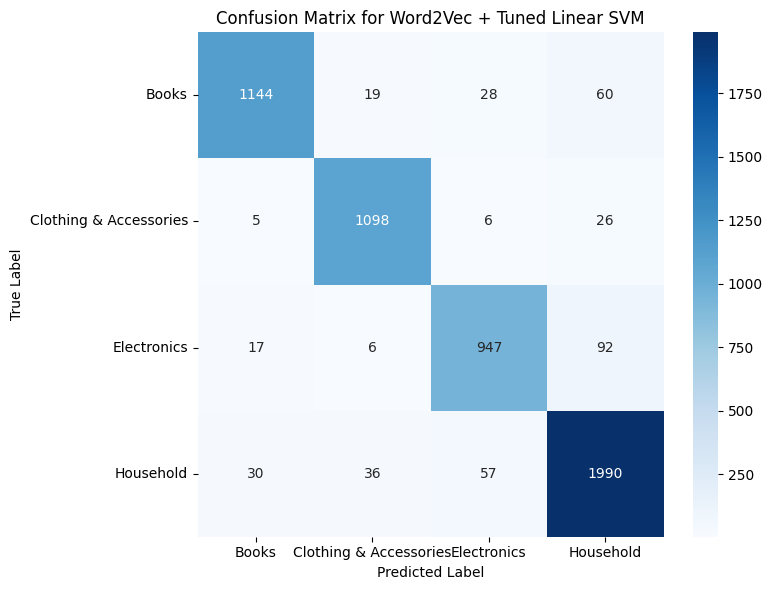

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Utility function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix for {title}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Plot all four confusion matrices
plot_conf_matrix(y_tfidf_test, y_pred_tfidf_rs, "TF-IDF + Tuned Linear SVM")
plot_conf_matrix(y_bow_test, y_pred_bow_rs, "BoW + Tuned Linear SVM")
plot_conf_matrix(y_glove_test, y_pred_glove_rs, "GloVe + Tuned Linear SVM")
plot_conf_matrix(y_word2vec_test, y_pred_w2v_rs, "Word2Vec + Tuned Linear SVM")

In [ ]:
!cat /proc/cpuinfo | grep "model name" | uniq
!cat /proc/meminfo | grep "MemAvailable"

model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
MemAvailable:    5724836 kB


**CONCLUSION -** In this assignment, we explored various text classification techniques by applying different feature extraction methods (TF-IDF, Bag of Words, GloVe, and Word2Vec) combined with Linear SVM. Our objective was to evaluate and compare the effectiveness of these approaches for classifying text data, particularly focusing on the performance in terms of accuracy, F1 score, and other classification metrics.

Model Performance:

Hyperparameter tuning of the Linear SVM model significantly improved performance, particularly when used with TF-IDF. We achieved an even higher accuracy and F1 score after fine-tuning parameter C.

The confusion matrix for TF-IDF with the tuned Linear SVM model showed that the classifier successfully differentiated between classes, with minimal misclassifications. This confirms the robustness of TF-IDF features for our dataset.

Finally:

TF-IDF with Linear SVM emerged as the best-performing combination for this text classification task, outperforming both the simpler BoW approach and more advanced word embeddings like GloVe and Word2Vec.

Even though word embeddings can capture more nuanced semantic relationships, they require careful handling and tuning to achieve the best results. In contrast, TF-IDF, despite its simplicity, worked effectively for our dataset.

The results highlight the importance of selecting the right feature extraction technique and model combination based on the nature of the dataset and the problem at hand. Hyperparameter tuning further enhanced the performance, showing the significance of optimizing model parameters for improved results.

Thus, for this assignment, TF-IDF combined with Linear SVM proved to be the most effective approach for our text classification task.